# Machine Learning Applications for Health (COMP90089_2022_SM2)
# Tutorial 5: Supervised Learning using MIMIC-IV data

> ## Goal: Predict the mortality risk for Sepsis Cohort
* We are going to play with two types of **Supervised** Algorithms: **Naive-Bayes and KNN.**
* The Python lybrary will be sklearn. To check their **documentation**, please click [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 


Set up the **environment**:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Access data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

import warnings
warnings.filterwarnings('ignore')


In [2]:
# authenticate
auth.authenticate_user()

* Next: Change the **project_id** variable (in the first line only) with the corresponding Project ID name of your Big Query project for MIMIC-IV. 

In [4]:
# Set up environment variables
project_id = 'CHANGE-ME'
if project_id == 'CHANGE-ME':
  raise ValueError('You must change project_id to your GCP project.')
os.environ["GOOGLE_CLOUD_PROJECT"] = project_id

# Read data from BigQuery into pandas dataframes.
def run_query(query, project_id=project_id):
  return pd.io.gbq.read_gbq(
      query,
      project_id=project_id,
      dialect='standard')

# set the dataset
dataset = 'mimiciv'


## Data

We'll use a cohort derived from MIMIC-IV.

* The query bellow is searching for the data in the **BigQuery Platform**.
* We are retrieving patients with **Sepsis**: A life-threatening complication caused by the body's response to an infection. When your immune system goes into **overdrive in response to an infection**, sepsis may develop as a result
* Further, we will join the Date of Death information, the age and gender from patients table.




In [ ]:
##We are retrieving patients using sepsis3 Table and joining it to patients Table.

df = run_query("""
SELECT sep.subject_id,sep.sofa_score,sep.respiration,sep.coagulation,sep.liver,sep.cardiovascular,sep.cns,sep.renal,pt.dod,pt.anchor_age,pt.gender
FROM `physionet-data.mimiciv_derived.sepsis3` as sep
INNER JOIN `physionet-data.mimiciv_hosp.patients` as pt
ON sep.subject_id = pt.subject_id
ORDER BY subject_id
""")
print(df)

> ## How is the data set? Analyse it!


* Analyse and prepare the Data: missing values, numerical or categorical features. What needs to be changed, replaced or even removed?

* What is the target column to be predicted by the classifier?
  * **Date of death** (dod column) is our target variable. What is the type of data? Is it suitable for machine learning?

In [ ]:
pd.set_option('display.max_columns', None) ##This is only to show all columns when printing a DataFrame

#Create a copy of the dataframe to work with
sepsis_df = df.copy()

#Check missing values 
print(sepsis_df.isnull().sum(),"\n\n")

#Check the type of data for each column. Notice that 'gender' is categorical (object) and 'dod' is time series.
print(sepsis_df.info())


### Transforming Categorical into Numbers:
* get_dummies: Columns with dtype = (object or category) will be converted.

In [ ]:
#Replace Date of Death times with binary (0 or 1)
sepsis_df.loc[sepsis_df['dod'].notna(),'dod'] = int(1)
sepsis_df.loc[sepsis_df['dod'].isnull(),'dod'] = int(0)
sepsis_df['dod'] = sepsis_df['dod'].astype(int)

#Transform Gender column from Categorical Data to Binary:
##WRITE THE CODE HERE

#Concatenate both Data frames:
##WRITE THE CODE HERE
final_sepsis  = 

#Final Data set to work with: remove 'subject_id','gender' columns.
##WRITE THE CODE HERE
final_sepsis  =


In [ ]:
#Check the final dtype of each column. Are they properly defined now? 
print(final_sepsis.info(),"\n\n")

#How is the data distributed? Outliers?
##WRITE THE CODE HERE

## How balanced is the data?
##WRITE THE CODE HERE


## Split the data set into random train and test subsets

* We will use the function **train_test_split** from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to randomly split the data, creating the training and testing subsets.

* Split the Dependent variables (or Features) from the Independent Variable (Target - what will be predicted)

In [ ]:
## Split the Dependent variables (or Features) from the Independent Variable (Target - what will be predicted)

# Target of classification
y = final_sepsis['dod']
# Features
X = final_sepsis.drop(['dod'], axis=1)

## Random suffle and create the subsets for training and testing
# We can keep 80% of the data to Train the model and the remaining 20% for Testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Check the subsets size: X_train:{}, y_train:{}, X_test:{}, y_test:{}. \n\n".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

print("X_train matches with y_train")
print("X_test matches with y_test")

> ## Naive-Bayes Classifier:

*Naive Bayes* methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

* **GaussianNB** implements the Gaussian Naive Bayes algorithm for classification.

* **Parameter**: 
  * **var_smoothing** (float, default=1e-9). It's the portion of the largest variance of all features that is added to variances for calculation stability.



 



In [10]:
#Training the Naive-Bayes:
classifier_NB = GaussianNB()
model_NB = classifier_NB.fit(X_train,y_train)

#Predict the classifier response for the Test dataset:
predictions_NB = model_NB.predict(X_test)

### Evaluate the model, how good is it? 

* The **sklearn.metrics** module implements several loss, score, and utility functions to measure classification performance.


In [ ]:
#Accuracy classification score
acc_NB = float(round(metrics.accuracy_score(y_test, predictions_NB),3))

#Compute the balanced accuracy.
bacc_NB = float(round(metrics.balanced_accuracy_score(y_test, predictions_NB),3))

#Compute the Matthews correlation coefficient (MCC)
mcc_NB = float(round(metrics.matthews_corrcoef(y_test, predictions_NB),3))

#Compute the F1 score, also known as balanced F-score or F-measure.
f1_NB = float(round(metrics.f1_score(y_test, predictions_NB),3))

#Save results as a DataFrame:
results = {'Accuracy' : [acc_NB], 'Balanced Accuracy' : [bacc_NB], 'MCC' : [mcc_NB], 'F1-Score' : [f1_NB]}
nb_results = pd.DataFrame.from_dict(data = results, orient='columns')
print(nb_results)

## Cross-Validation: a roubust approach for evaluating the model performance

* In the basic approach, called k-fold CV, the training set is split into k smaller sets.
* **cross_val_score**: Evaluate a score by cross-validation. See short doc [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) and long [here](https://scikit-learn.org/stable/modules/cross_validation.html).

* Let's try again with the Naive-Bayes.

In [ ]:
##Let's try again with the Naive-Bayes and full data set:

#Number of Folds to split the data:
folds = 5

#Call the function of cross-validation passing the parameters:
scores = cross_val_score(estimator = classifier_NB, X = X_train, y = y_train, cv = folds, scoring = 'f1') #can replace scoring string by = ‘f1’, ‘accuracy’, 'balanced_accuracy'.
print(scores)



In [ ]:
##Check the performance results per fold:

cv_metrics_NB = pd.DataFrame(data = scores, columns = ['F1-Score_CV'], index = ['cv_1','cv_2','cv_3','cv_4','cv_5'])
print(cv_metrics_NB)
print("The mean F1 Score over the 5 folds is: ",round(scores.mean(),3))

### Improving Naive-Bayes:

* **GridSearchCV**: Exhaustive search over specified parameter values for an estimator. Check the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
* Example of Tutorial: [here](https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba)

Remember that **var_smoothing** is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. 

In [ ]:
##Check different values for the parameter var_smoothing 

#In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

# Search for the best var_smooting parameter value using the Training Data set under a 5 fold cross-validation approach
nbModel_grid = GridSearchCV(estimator = GaussianNB(), param_grid = param_grid_nb, verbose = 1, cv = 5)
nbModel_grid.fit(X_train, y_train)

# Print the best parameter value: 
print(nbModel_grid.best_estimator_)

* Evaluate the Performance again for the tuned Naive-Bayes model:

In [ ]:
## Evaluate the Performance of the new Naive-Bayes model with the Testing set

#Predict the testing set
y_pred = nbModel_grid.predict(X_test)

#Accuracy classification score
acc_NB_new = float(round(metrics.accuracy_score(y_test, y_pred),3))

#Compute the balanced accuracy.
bacc_NB_new = float(round(metrics.balanced_accuracy_score(y_test, y_pred),3))

#Compute the Matthews correlation coefficient (MCC)
mcc_NB_new = float(round(metrics.matthews_corrcoef(y_test, y_pred),3))

#Compute the F1 score, also known as balanced F-score or F-measure.
f1_NB_new = float(round(metrics.f1_score(y_test, y_pred),3))

#Show results as a DataFrame:
results_new = {'Accuracy' : [acc_NB_new], 'Balanced Accuracy' : [bacc_NB_new], 'MCC' : [mcc_NB_new], 'F1-Score' : [f1_NB_new]}
nb_results_new = pd.DataFrame.from_dict(data = results_new, orient='columns')
print(nb_results_new)

print("\n\n Previous performance results BEFORE parameter optimisation: \n",nb_results)


### **Bonus**: K-Nearest Neighbors Classifier

*Neighbors-based* classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

* **KNeighborsClassifier** implements learning based on the  nearest neighbors of each query point, where  is an integer value specified by the user.

* **Parameter**: 
  * **n_neighborsint**: Number of neighbours (default = 5)
  * Choosing the optimal value of n_neighborsint is critical, so we fit and test the model for different values.

In [ ]:
#KNN

## How to choose the best number of neighbours? Let's create a range and see it!

k_values = range(1,20)
KNN_scores = []

for n in k_values:
  classifier_KNN = KNeighborsClassifier(n_neighbors = n)
  model_KNN = classifier_KNN.fit(X_train,y_train)
  
  #Predict the classifier's responses for the Test dataset
  predictions_KNN = model_KNN.predict(X_test)

  #Evaluate using MCC:
  KNN_scores.append(float(round(metrics.matthews_corrcoef(y_test, predictions_KNN),3)))

print(KNN_scores)


* ### Visualise how the MCC metric varies with different values of Neighbours:

Text(0, 0.5, 'MCC Performance')

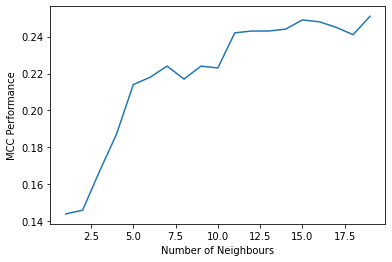

In [20]:
##Visualise how the MCC metric varies with different values of Neighbors:
plt.plot(k_values, KNN_scores)
plt.xlabel("Number of Neighbours")
plt.ylabel("MCC Performance")


In [ ]:
#Get the number of neighbours of the maximum MCC score:
print(KNN_scores.index(max(KNN_scores))+1)

In [ ]:
classifier_KNN_new = KNeighborsClassifier(n_neighbors = 19)
model_KNN_new = classifier_KNN_new.fit(X_train,y_train)
  
#Predict the classifier's responses for the Test dataset
predictions_KNN_new = model_KNN_new.predict(X_test)


## Evaluate the different Performance metrics for the new KNN model with the Testing set

#Accuracy classification score
acc_KNN_new = float(round(metrics.accuracy_score(y_test, predictions_KNN_new),3))

#Compute the balanced accuracy.
bacc_KNN_new = float(round(metrics.balanced_accuracy_score(y_test, predictions_KNN_new),3))

#Compute the Matthews correlation coefficient (MCC)
mcc_KNN_new = float(round(metrics.matthews_corrcoef(y_test, predictions_KNN_new),3))

#Compute the F1 score, also known as balanced F-score or F-measure.
f1_KNN_new = float(round(metrics.f1_score(y_test, predictions_KNN_new),3))

#Show results as a DataFrame:
results_KNN_new = {'Accuracy' : [acc_KNN_new], 'Balanced Accuracy' : [bacc_KNN_new], 'MCC' : [mcc_KNN_new], 'F1-Score' : [f1_KNN_new]}
KNN_results_new = pd.DataFrame.from_dict(data = results_KNN_new, orient='columns')
print(KNN_results_new)